## Importing the dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/70-dog-breedsimage-data-set")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/70-dog-breedsimage-data-set


In [2]:
import os
os.listdir(path)

['valid', 'dogs.csv', 'test', 'train']

In [3]:
train_path = path + '/train'
test_path = path + '/test'
valid_path = path + '/valid'
# os.listdir(train_path)

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

In [5]:
train_imgs = image_dataset_from_directory(train_path, image_size=(224, 224), batch_size=32,labels='inferred', label_mode='int')
train_imgs

test_imgs = image_dataset_from_directory(test_path, image_size=(224, 224), batch_size=32,labels='inferred', label_mode='int')
test_imgs

valid_imgs = image_dataset_from_directory(valid_path, image_size=(224, 224), batch_size=32,labels='inferred', label_mode='int')
valid_imgs

Found 7946 files belonging to 70 classes.
Found 700 files belonging to 70 classes.
Found 700 files belonging to 70 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Adding Data Augmentation to avoid overfitting

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


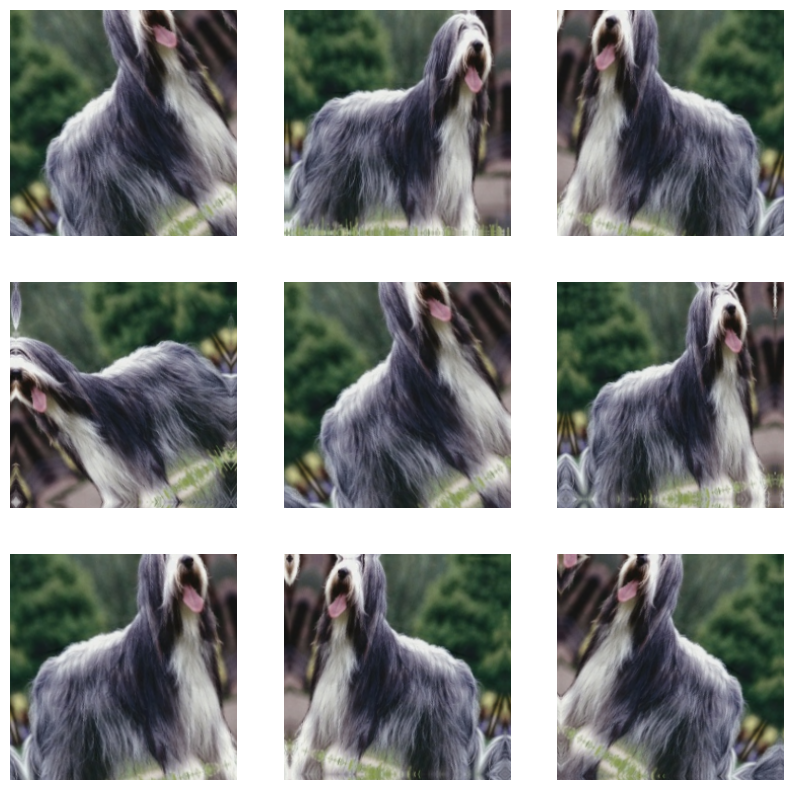

In [6]:
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

plt.figure(figsize=(10, 10))
for images, _ in train_imgs.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Building the CNN

In [7]:
from tensorflow import keras
from tensorflow.keras import layers, models

# Create the CNN model
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(1024, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(70, activation='softmax')  # 70 classes in the dog breed dataset
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy','sparse_categorical_accuracy'])

## Adding Early Stopping

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True,mode='auto')

## Fitting the Model

In [9]:
training = model.fit(
    train_imgs,
    epochs=50,
    validation_data=valid_imgs,
    callbacks=[early_stopping]
)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.0233 - loss: 5.2885 - sparse_categorical_accuracy: 0.0233 - val_accuracy: 0.0286 - val_loss: 4.1021 - val_sparse_categorical_accuracy: 0.0286
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.0486 - loss: 3.9704 - sparse_categorical_accuracy: 0.0486 - val_accuracy: 0.0757 - val_loss: 3.7628 - val_sparse_categorical_accuracy: 0.0757
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.0820 - loss: 3.7013 - sparse_categorical_accuracy: 0.0820 - val_accuracy: 0.1214 - val_loss: 3.4315 - val_sparse_categorical_accuracy: 0.1214
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.1185 - loss: 3.5149 - sparse_categorical_accuracy: 0.1185 - val_accuracy: 0.1429 - val_loss: 3.3704 - val_sparse_categorical_accuracy: 0.1429
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.1467 - loss: 3.3314 - sparse_categorical_accuracy: 0.1467 - val_accuracy: 0.1857 - val_loss:

## Evaluating the Model

In [10]:
loss, accuracy, val_sprse_categorical = model.evaluate(test_imgs)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4683 - loss: 2.1127 - sparse_categorical_accuracy: 0.4683


<Axes: title={'center': 'Accuracy'}>

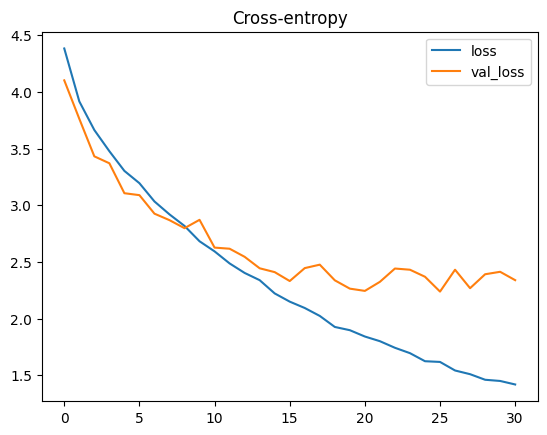

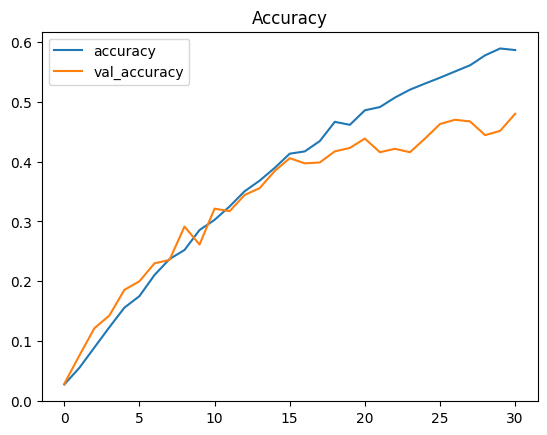

In [11]:
import pandas as pd

history_df = pd.DataFrame(training.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

## Making Test Predicitons

In [12]:
import numpy as np

predictions = model.predict(test_imgs)
predictions

predictedVal1 = np.argmax(predictions, axis=1)
print(predictedVal1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
[ 9 66 55  3 65 38 26 47 33 64 53 47 63 45 18 39 17 27  8 50  2 32  5 39
 36 45 42 52 61 39 10 24 63 31 52 54 54 33 15  2  7 12  0  8 55  8 49 48
 50 31 66 51  1 18 29 39 45 38 20 25 67 16 23  9 37 25 65 52 66 17 25 54
 65 63 29 19 20  1 46 46  7 32 47 20 47 43 25 46  2  4 20 68 25 30 56  7
  1  7 59 38  0 17 17 27 12 30 39 67 62 53 66 39 64 59 34 47 18 29  5 64
 48 29  8 41 34 48 20 17 22 11 42 43 52 42  2 44  1 47 62 34 37 17 18 35
 27 24 22 64 47 64 25 24 50 56 54 12 43 69 18 20  3 39 30 29 55  4 20 54
  5 65 36 18 47 49 50 16 47 60 10 27 47 63 55 13 58 62 54 58  6 10 20  1
 65 17  1  1 38 43 44  5 13 42 39 23 39  5 47 60 16 26 43 39 67 61 69 28
 40 56 39 54 32 39 11 65 20 11 57 45 32 69 41 34 38 34 42 32 20 14 43 23
 48 30 50 50 30  6 18 46 68  7 31 63 17 37 10 13 52 51  9 39 55 66 27 14
 61 18 39 40 65 20 34 42 47 20 49 65 42 34 52 58 50 39 51 55 21 46 34  1
 20 37  8 38 39 28 15 20 17 12 15 50 59 48 43 11 49 11 18 34 15 31 21  7
 22 38 63 5

## Saving the model

<ipython-input-13-4e7178aa5596>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(true_labels-predictedVal1)


<Axes: ylabel='Density'>

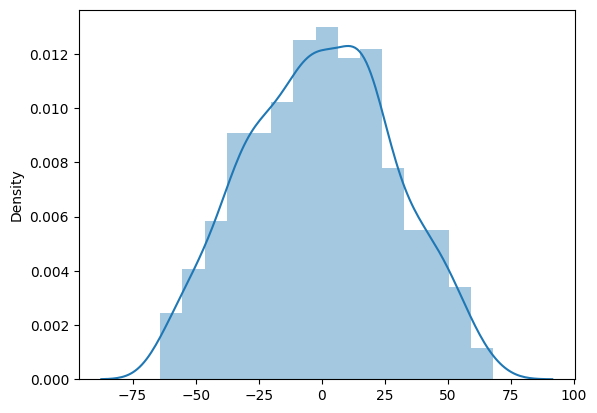

In [13]:
import seaborn as sns
true_labels = np.concatenate([y for x, y in test_imgs], axis=0)
true_labels-predictedVal1
sns.distplot(true_labels-predictedVal1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


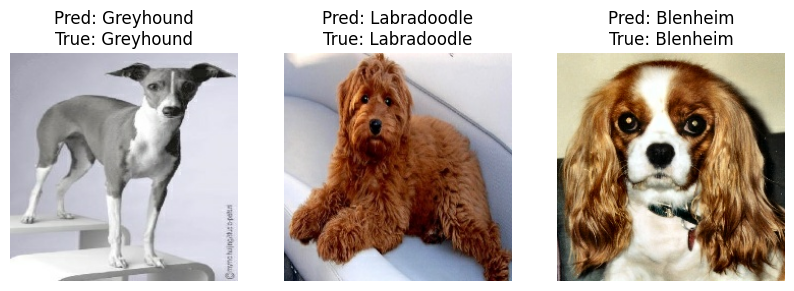

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Class names (if known)
class_names = test_imgs.class_names  # Only works if you used labels='inferred'

# Get one batch from the dataset
for images, labels in test_imgs.take(1):
    predictions = model.predict(images)

    predicted_classes = np.argmax(predictions, axis=1)

    # Plot images with predictions
    plt.figure(figsize=(10, 5))
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

        pred_label = class_names[predicted_classes[i]]
        true_label = class_names[labels[i].numpy()]
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    break


## Saving the model

In [15]:
model.save('cnn.h5')
